# Circle Inversion

In [11]:
#Running this cell displays a button to toggle hidden code
#From: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/

from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

Circle inversion is a mathematical tool that involves reflecting points across a circle. What does this mean exactly? We start with a circle of radius $r$ and center point $O$. All of our "reflections" will be done with respect to this circle. Now let's take a point $A$ inside the circle, with distance $d$ from the center. Its reflection, point $A'$, will be in line with the line connection the center $O$ and point $A$, and it will be a distance of $\frac{r^2}{d}$ away from $O$.

Another way to state this is that $OA^2 * OA'^2 = r^2$.

![Inversion](https://github.com/Ariel-VB/Circle-Inversion/blob/master/Inversion2.png?raw=true)

Let's think carefully about what this means. Any point inside of the circle will be inverted *outside* of the circle, and likewise any point outside of the circle will be inverted *inside* the circle.  We're essentially turning the circle inside-out, inverting it. Applying the inversion twice gives us the point we started with: $(A')' = A$. Any point that is on the circle will not move when it is inverted, since $\frac{r^2}{r} = r$. As points get closer to the center, their inversions get farther and farther away. The point $O$ at the center inverts to infinity, since we end up dividing by zero.

We can also reflect more complicated objects like lines and circles.

### Experiment with inversions!

With the widget below, you can experiment by inverting different types of shapes over the unit circle. The original object will be shown in blue, and its inversion will be showwn in red. For a point, you can adjust its vertical and horizontal positions through the $x$ and $y$ sliders. For a line, you can adjust its angle and vertical intercept $b$. For a circle, you can adjust the position of the center and its radius.

In [39]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, Layout, Button, Box
import ipywidgets as widgets
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

class Invert():
    
    """
        Plots the inverse of the shape given:
        shape = "point", "line", or "circle"

        x, y: are used as point coordinates and circle center coordinates
        m, b: are used as slope and intercept of a line
        r: is used as the radius of a circle
    """
    
    shape = None
    x = None
    y = None
    m = None
    b = None
    r = None
    
    def __init__(self, shape, x = 0, y = 0, m = 0, b = 0, r = 0):
        
        self.shape = shape
        self.x = x
        self.y = y
        self.m = m
        self.b = b
        self.r = r

    def plot_inversion(self, **kwargs):

        '''
        Plots the given shape and its inverse.
        Takes shape, x, y, m, b, and r values as **kwargs.
        '''
        #Setting values given in kwargs:
        for key, value in kwargs.items():
            
            if key == "shape":
                self.shape = value
                
            if key == "x":
                self.x = value
                
            if key == "y":
                self.y = value
                
            if key == "m":
                self.m = value
                
            if key == "b":
                self.b = value
                
            if key == "r":
                self.r = value
                
            #For inverting a line; the angle (0-pi radians) will be used instead of the slope (m)
            if key == "angle":
                self.m = 1/np.tan(np.deg2rad(value))

        #Setting up the graph:
        fig = plt.figure(figsize=(20, 20))
        ax = plt.subplot()
        ax.grid(False)

        #Plotting the unit circle and center point:
        circle = plt.Circle((0,0), radius=1, color='k', fill=False)
        ax.add_patch(circle)
        plt.plot(0, 0, "ko")

        #inverting a point:
        if self.shape == "point":

            #Plot the point given:
            plt.plot(self.x, self.y, 'bo')

            #Plot the inverse point, if it isn't at infinity:
            try:
                inv_x = self.x/(self.x**2 + self.y**2)
                inv_y = self.y/(self.x**2 + self.y**2)

                plt.plot(inv_x, inv_y, "ro")
                
            except ZeroDivisionError:
                pass


        #inverting a line:
        if self.shape == "line":

            #Plot the line given:
            x = np.linspace(-50, 50, num = 50000)
            y = self.m*x + self.b
            plt.plot(x, y, color = "blue")

            #Plot the inverse:
            try:
                inv_x = x/(x**2 + y**2)
                inv_y = y/(x**2 + y**2)

                plt.plot(inv_x, inv_y, color = "red")
            
            #If line is vertical:
            except ZeroDivisionError:
                pass

        #inverting a circle:
        if self.shape == "circle":
            
            #Plot the given circle:
            #Upper half:
            try:
                x1 = np.linspace((self.x - self.r), (self.x + self.r), num = 50000)
                y1 = np.sqrt(((self.r)**2 - (x1 - self.x)**2)) + self.y

                #Lower half:
                x2 = x1
                y2 = -np.sqrt(((self.r)**2 - (x1 - self.x)**2)) + self.y

                plt.plot(x1, y1, color = "blue")
                plt.plot(x2, y2, color = "blue")
            except:
                pass
            
            #Plot the inverse:
            try:
                inv_x1 = x1/(x1**2 + y1**2)
                inv_y1 = y1/(x1**2 + y1**2)
                inv_x2 = x2/(x2**2 + y2**2)
                inv_y2 = y2/(x2**2 + y2**2)
                
                plt.plot(inv_x1, inv_y1, color = "red")
                plt.plot(inv_x2, inv_y2, color = "red")
             
            except:
                pass
            

        #Set the axis scale and show the plot:
        plt.axis([-5,5,-5,5])
        plt.show()

def inversion_diagram(shape):
    
    #Displays an interactive diagram that inverts a point:
    if shape == "point":
        
        #Creating new Invert object and an interactive widget:
        point_inv = Invert(shape = "point")
        point_widget = interactive(point_inv.plot_inversion, x=(-5,5,.1), y=(-5,5,.1))

        point_widget.children[0].layout.width = '99%'
        point_widget.children[1].layout.width = '99%'
        point_widget.children[0].description = r'$x$'
        point_widget.children[1].description = r'$y$'

        display(point_widget)
        
    #Displays an interactive diagram that inverts a line:
    if shape == "line":
        
        #Creating new Invert object and an interactive widget:
        line_inv = Invert(shape = "line")
        line_widget = interactive(line_inv.plot_inversion, angle = (0,180,5), b = (-10,10,.1))

        line_widget.children[0].layout.width = '99%'
        line_widget.children[1].layout.width = '99%'
        line_widget.children[0].description = 'Angle'
        line_widget.children[1].description = r'$b$'

        display(line_widget)
        
    if shape == "circle":
        
        #Creating new Invert object and an interactive widget:
        circle_inv = Invert(shape = "circle")
        circle_widget = interactive(circle_inv.plot_inversion, x = (-5,5,.1), y = (-5,5,.1), r = (0, 5, .1))

        circle_widget.children[0].layout.width = '99%'
        circle_widget.children[1].layout.width = '99%'
        circle_widget.children[2].layout.width = '99%'
        circle_widget.children[0].description = r'$x$'
        circle_widget.children[1].description = r'$y$'
        circle_widget.children[2].description = r'$r$'

        display(circle_widget)
        
        
def interact_inversion():
    
    #Creates three buttons, for selecting whether to invert a point, line or circle
    #Sets up the layout of the buttons and box
    button_layout = Layout(height='40px', min_width='40px')
    box_layout = Layout(justify_content = "center")

    #Creates the buttons
    button1 = widgets.Button(description = "Point", button_style = "primary", layout = button_layout)
    button2 = widgets.Button(description = "Line", button_style = "primary", layout = button_layout)
    button3 = widgets.Button(description = "Circle", button_style = "primary", layout = button_layout)

    buttons = [button1, button2, button3]

    #Creates the box
    button_box = Box(children = buttons, layout = box_layout)

    #Displays the box with the buttons in it
    print("Which type of object would you like to invert?")
    display(button_box)
    
    #Button event handlers:
    def button1_clicked(b):        
        clear_output()
        display(button_box)
        inversion_diagram("point")
        
    def button2_clicked(b):        
        clear_output()
        display(button_box)
        inversion_diagram("line")
        
    def button3_clicked(b):        
        clear_output()
        display(button_box)
        inversion_diagram("circle")
        
    button1.on_click(button1_clicked)
    button2.on_click(button2_clicked)
    button3.on_click(button3_clicked)


In [40]:
interact_inversion()

Box(children=(Button(button_style='primary', description='Point', layout=Layout(height='40px', min_width='40px…

interactive(children=(FloatSlider(value=0.0, description='$x$', layout=Layout(width='99%'), max=5.0, min=-5.0)…

### More inversions

Now let's look at what happens to some specific shapes when they are inverted, starting with a line that passes through the center of the circle:

![Inversion](https://github.com/Ariel-VB/Circle-Inversion/blob/master/Inversion3.png?raw=true)

The points inside the circle get mapped to points on the line outside of the circle, and vice versa. The line passes through the center point $O$, and so the complete inversion must be a line going to infinity.

Circles invert to other circles, *except* when they pass through $O$, in which case they are straight lines going to infinity. These cases may be thought of as infinitely large circles, "generalized circles", so large that their edge is straight and they are indistinguishable from lines. In this case, we can say that circles always map to circles, and if the circle passes through $O$ or infinity, its inversion will pass through infinity or $O$ respectively.

![Inversion](https://github.com/Ariel-VB/Circle-Inversion/blob/master/Inversion4.png?raw=true)

#### Watch this video by Numberphile for an interesting application of circle inversion:

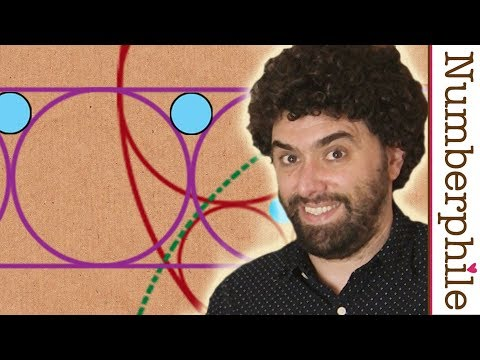

In [29]:
from IPython.display import YouTubeVideo
YouTubeVideo('sG_6nlMZ8f4')

### Sources

Problems for Senior High School Math, by Peter D. Taylor

http://www.malinc.se/noneuclidean/en/circleinversion.php

https://www.youtube.com/watch?v=sG_6nlMZ8f4